In [1]:
from filecmp import cmp
from cv2 import WINDOW_FULLSCREEN
import os
import numpy as np
import cv2, pydicom
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut

In [12]:
class Dicom():
    def __init__(self, dicom_path=None, window_center=None, window_width=None):
        self.dicom_path = dicom_path
        self.window_center = window_center
        self.window_width = window_width
        
        self.raw_img = self.dicom_to_array(self.dicom_path)
        self.image = self.dicom_windowing(self.raw_img, self.window_center, self.window_width)

    def dicom_to_array(self, dicom_path):
        self.slice = pydicom.read_file(dicom_path)
        s = int(self.slice.RescaleSlope)
        b = int(self.slice.RescaleIntercept)
        return s * self.slice.pixel_array + b

    def dicom_windowing(self, image, window_center, window_width):
        self.slice.WindowCenter, self.slice.WindowWidth = window_center, window_width
        return apply_voi_lut(apply_modality_lut(image, self.slice), self.slice)
    
    def get_image(self):
        return self.image

data_list = os.listdir('data/Sample1')
dicom_path = os.path.join('data/Sample1',data_list[0])
dicom_file = Dicom(dicom_path=dicom_path, window_center=-600, window_width=1000)
image = dicom_file.get_image()

Text(0.5, 1.0, 'Window Center : -600, Window Width : 1000')

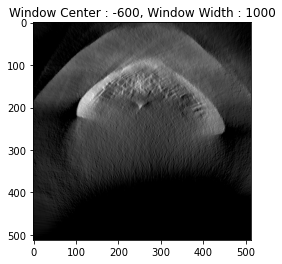

In [14]:
plt.imshow(image, cmap="gray")
plt.title(f"Window Center : {dicom_file.window_center}, Window Width : {dicom_file.window_width}")

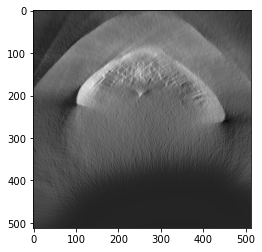

In [15]:
plt.imshow(dicom_file.raw_img, cmap='gray')

In [17]:
(np.min(image), np.max(image)), (np.min(dicom_file.raw_img), np.max(dicom_file.raw_img))

((-1024.0, 3071.0), (-347, 928))

In [25]:
slice = pydicom.dcmread(dicom_path)
img = slice.pixel_array
img.shape

(512, 512)

In [26]:
np.min(img), np.max(img)

(677, 1952)

In [23]:
dicom_file.raw_img.shape

(512, 512)

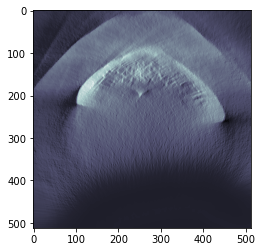

In [27]:
plt.imshow(dicom_file.raw_img, cmap=plt.cm.bone)

In [29]:
import SimpleITK as sitk

img = sitk.ReadImage(dicom_path)
img_array = sitk.GetArrayFromImage(img)

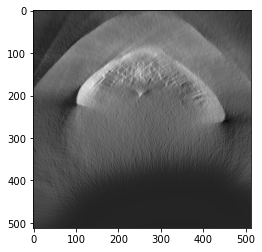

In [31]:
plt.imshow(img_array[0], cmap='gray')

In [33]:
np.min(img_array[0]), np.max(img_array[0])

(-347, 928)

In [136]:
def print_min_max(img):
    print(f"{np.min(img), np.max(img)}")

def trans_to_hu(slice):
    slice = pydicom.read_file(dicom_path)
    s = slice.RescaleSlope
    b = slice.RescaleIntercept
    return s * slice.pixel_array + b

def window_image(img, window_center, window_width):
    img_min = window_center - window_width / 2
    img_max = window_center + window_width / 2
    window_img = img.copy()
    window_img[window_img < img_min] = img_min
    window_img[window_img > img_max] = img_max
    return window_img

def dicom_windowing(slice, image, window_center, window_width):
    slice.WindowCenter, slice.WindowWidth = window_center, window_width
    return apply_voi_lut(apply_modality_lut(image, slice), slice)

wc, ww = 600, 1200

dicom_path = os.path.join('data/Sample1',data_list[100])
slice = pydicom.dcmread(dicom_path)
raw_img = slice.pixel_array
print_min_max(raw_img)
hu_img = trans_to_hu(slice)
print_min_max(hu_img)
window_img = window_image(hu_img, wc, ww)
print_min_max(window_img)
window_img2 = dicom_windowing(slice, hu_img, wc, ww)
print_min_max(window_img2)

(714, 4095)
(-310.0, 3071.0)
(0.0, 1200.0)
(-1024.0, 3071.0)


In [137]:
slice.WindowCenter, slice.WindowWidth

('600.0', '1200.0')

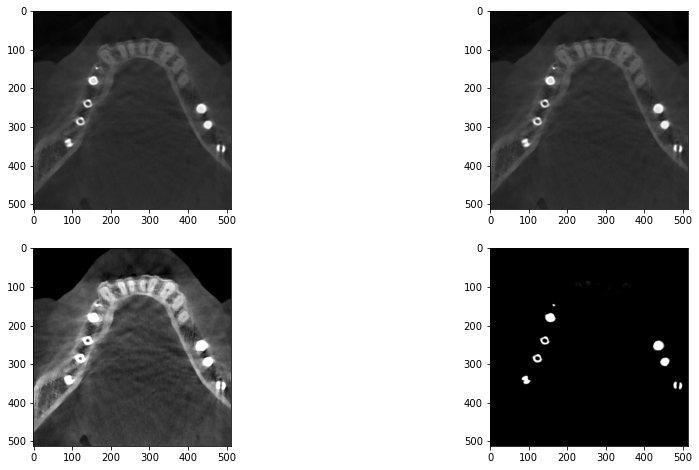

In [138]:
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
plt.imshow(raw_img, cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(hu_img, cmap='gray')

plt.subplot(2, 2, 3)
plt.imshow(window_img, cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(window_img2, cmap='gray')

plt.show()

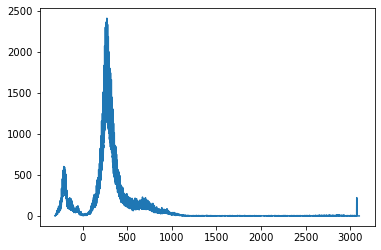

In [139]:
import cv2
# hist1 = cv2.calcHist([hu_img], [0], None, [256],[0, 256])
# plt.plot(hist1)

hist2, bins = np.histogram(hu_img.flatten(), 3000, [-310, 3100])
plt.plot(np.linspace(-310, 3100, 3000),hist2)

In [48]:
img = slice.pixel_array.astype(np.float32)

In [52]:
np.min(img), np.max(img)

(714.0, 4095.0)

In [54]:
img = (img / (2 ** slice.BitsStored))

In [56]:
print_min_max(img)

(0.1743164, 0.99975586)


In [57]:
slice.RescaleSlope

'1.0'

In [58]:
slice.RescaleIntercept

'-1024.0'

In [61]:
img2 = slice.pixel_array * slice.RescaleSlope + slice.RescaleIntercept
print_min_max(img2)

(-310.0, 3071.0)
